In [1]:
import numpy as np
import cvxpy as cvx

In [2]:
from helper import conv,solve

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'svg'
% config InlineBackend.rc = {'figure.figsize': (5,3.5)}

In [370]:
n=100
m=10
lamb = 1/2

idx = np.random.choice(n_true,size=(m,n))
X = X_true[idx,:]
r = r_true[idx]

q = 1/(2*lamb) * (X*r[:,:,None]).mean(axis=1)
insample = (r*np.einsum('mnp,mp->mn',X,q)).mean(axis=1)
outsample = (r_true * np.einsum('tp,mp->mt',X_true,q)).mean(axis=1)

In [384]:
n_true = 10_000
p = 5
X_true = np.random.randn(n_true,p)
# r_true = np.random.randn(n_true)
r_true = X_true.sum(axis=1)
# r_true /= r_true.std()

In [0]:
def conv2q(n,m=100):
    lamb = 1/2

    idx = np.random.choice(n_true,size=(m,n))
    X = X_true[idx,:]
    r = r_true[idx]
        
    q = 1/(2*lamb) * (X*r[:,:,None]).mean(axis=1)
    return q

In [385]:
ns = np.arange(5,205,5)
l = len(ns)
norm = np.zeros(l)
for i,n in enumerate(ns):
    qs = conv2(n,m=100)
    norm[i] = np.linalg.norm(qs,axis=1).max()


In [378]:
def conv2(n,m=100):
    lamb = 1/2

    idx = np.random.choice(n_true,size=(m,n))
    X = X_true[idx,:]
    r = r_true[idx]

    q = 1/(2*lamb) * (X*r[:,:,None]).mean(axis=1)
    insample = (r*np.einsum('mnp,mp->mn',X,q)).mean(axis=1)
    outsample = (r_true * np.einsum('tp,mp->mt',X_true,q)).mean(axis=1)
    return insample,outsample

In [379]:
ns = np.arange(10,110,10)
l = len(ns)
diff = np.zeros(l)
for i,n in enumerate(ns):
    ins,outs = conv2(n,m=100)
    diff[i] = (ins-outs).max()

In [380]:
plt.plot(ns,diff,ns,10/np.sqrt(ns),ns,35/ns)
# plt.plot(ns,np.min(outs))
plt.xlabel('$n$');
# plt.ylabel('Erreur de généralisation');
plt.title('p=O(1)');

In [383]:
X_true = np.random.binomial(1,0.5,n_true)*0.1
X_true

array([ 0. ,  0.1,  0. , ...,  0.1,  0. ,  0.1])

In [122]:
ps = np.arange(10,310,10)
l = len(ps)
in_mn = np.zeros(l)
in_std = np.zeros(l)
out_mn = np.zeros(l)
out_std = np.zeros(l)
n = 100
for i,p in enumerate(ps):
    insample,outsample = conv(n,p)
    in_mn[i] = insample.mean()
    in_std[i] = insample.std()
    out_mn[i] = outsample.mean()
    out_std[i] = outsample.std()

In [154]:
plt.plot(ps,in_mn-out_mn)
plt.title('$n=O(1)$');

In [150]:
ps = np.arange(10,310,10)
ns = ((ps)).astype(int)
ins = np.empty(len(ns))
outs = np.empty(len(ns))
for i,(n,p) in enumerate(zip(ns,ps)):
    insample,outsample = conv(n,p)
    ins[i] = insample.mean()
    outs[i] = outsample.mean()

In [152]:
plt.plot(ps,ins-outs);
plt.axis(ymin=0,ymax=1.5);
plt.title('p=O(n)');

In [4]:
def solve(X,r,lamb):
    n,p = X.shape
    q = cvx.Variable(p)
    obj = 1/n* cvx.sum_entries(cvx.mul_elemwise(r,X*q)) - lamb*cvx.norm(q)**2
    prob = cvx.Problem(cvx.Maximize(obj))
    prob.solve()
    return q.value.A1

In [7]:
solve(Xs[:,:50],rs,1)

array([ 0.16269794,  0.15743324,  0.1491493 ,  0.1527219 ,  0.15142646,
        0.15689675,  0.15218115,  0.15662066,  0.16213456,  0.16418675])

In [26]:
Xs = np.random.randn(500,3)
rs = Xs.sum(axis=1)
rs = rs/rs.std()

In [27]:
np.cov(Xs[:,2],rs)

array([[ 0.91072396,  0.55857134],
       [ 0.55857134,  1.00200401]])

In [34]:
scat = plt.scatter(*(Xs[:,:2].T),c=rs,cmap='seismic')
plt.colorbar(scat)

In [187]:
10*np.corrcoef(Xs[:,2],rs)

array([[ 10.        ,   3.28026432],
       [  3.28026432,  10.        ]])

In [190]:
((Xs.T)@rs/10000).mean()

0.31394288748607757

In [197]:
m = np.cov(Xs.T)
id = np.ones(10)
np.trace(m)

9.9648002478527431

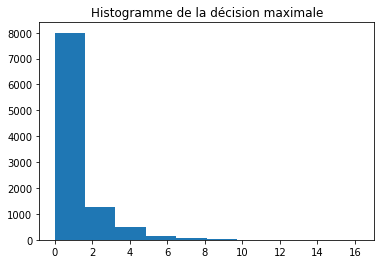

In [207]:
qs = np.dot(rs,Xs)/10000
plt.hist(rs*(Xs.dot(qs)));
plt.title('Histogramme de la décision maximale');

In [212]:
np.sqrt(np.sum(qs**2))

0.99323474897818753